In [40]:
import pandas
import numpy, math
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.mlab as mlab
from sklearn import datasets
from scipy.stats import norm
import scipy
from statsmodels.stats.proportion import proportion_confint
import statsmodels
essence = pandas.read_csv("essence.txt")
guerison = pandas.read_csv('guerison.txt')

In [17]:
xbar = numpy.mean(essence['conso'])
round(xbar,2)

31.45

In [18]:
sprime = numpy.std(essence['conso'],ddof=1)
round(sprime,2)

2.16

In [19]:
sprime2 = numpy.var(essence['conso'],ddof=1)
round(sprime2,2)

4.66

In [20]:
v = numpy.var(essence['conso'])
round(v,2)

4.63

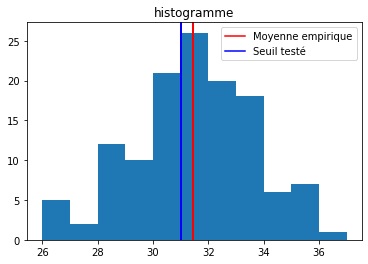

In [21]:
mu0=31

%matplotlib inline
plt.hist(essence['conso'], bins = range(26,38))
plt.title('histogramme')
plt.axvline(xbar, color='r', linewidth = 2)
plt.axvline(mu0, color = 'b', linewidth = 2 )
plt.legend(handles = [mlines.Line2D([],[], color = 'red', markersize = 15, label = 'Moyenne empirique'),mlines.Line2D([],[], color ='blue',markersize = 15, label = 'Seuil testé')])

AttributeError: 'Rectangle' object has no property 'normed'

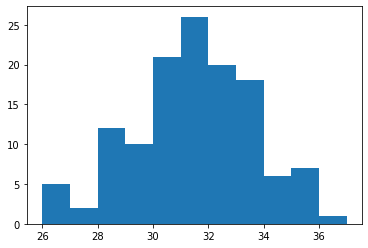

In [22]:
import matplotlib.mlab as mlab
fig, ax = plt.subplots()
n, bins, patches = ax.hist(essence['conso'],normed=True,bins=range(26,38))
bins=numpy.arange(26,37,0.1)
y = mlab.normpdf(bins, xbar,sprime)*100
ax.plot(bins, y, '--')
ax.set_xlabel('Smarts')
ax.set_title(u"Histogramme et densité normale")

In [23]:
n_guerison = len(guerison)
n_guerison_gueris = sum(guerison[guerison['guerison']==1]['guerison'])
p_estim = n_guerison_gueris/float(n_guerison)

In [24]:
alpha = 0.05
from scipy.stats import norm
icinf=p_estim-norm.ppf(1-alpha/2)*math.sqrt(p_estim*(1-p_estim)/n_guerison)
round(icinf,2)

0.72

In [25]:
icsup=p_estim+norm.ppf(1-alpha/2)*math.sqrt(p_estim*(1-p_estim)/n_guerison)
round(icsup,2)

0.83

In [26]:
from statsmodels.stats.proportion import proportion_confint
proportion_confint(n_guerison_gueris, n_guerison, alpha=alpha, method='normal')

(0.7172980758199328, 0.8289982204763635)

In [27]:
proportion_confint(n_guerison_gueris, n_guerison, alpha=0.1, method='normal')

(0.7262772899287175, 0.8200190063675787)

In [32]:
n_essence = len(essence)
incif1=xbar-scipy.stats.t.ppf(1-alpha/2, n_essence-1)*sprime/math.sqrt(n_essence)
print(incif1)

31.071691201697686


In [33]:
insup1=xbar+scipy.stats.t.ppf(1-alpha/2, n_essence-1)*sprime/math.sqrt(n_essence)
print(insup1)

31.82721504830229


In [38]:
statsmodels.stats.proportion.binom_test(n_guerison_gueris, n_guerison, prop=0.75, alternative = 'larger')

0.24183479554060147

In [39]:
scipy.stats.ttest_lsamp(essence['conso'],31)

AttributeError: module 'scipy.stats' has no attribute 'ttest_lsamp'

In [41]:
Iris = datasets.load_iris()

In [42]:
def function(x):
    return Iris['target_names'][x]
iris=pandas.DataFrame(Iris["data"])
iris.columns = Iris['feature_names']
iris["Species"]=Iris['target']
iris["Species"]=iris["Species"].apply(function)

In [43]:
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [44]:
versi = iris[iris["Species"]=="versicolor"]["petal length (cm)"]
virgi = iris[iris["Species"]=="virginica"]["petal length (cm)"]

In [45]:
scipy.stats.bartlett(versi,virgi)

BartlettResult(statistic=1.249026225204677, pvalue=0.2637385445079441)